In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions_df = pd.read_csv("Transactions.csv")
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [3]:
print("Dataset Info:")
print(transactions_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None


In [4]:
print("\nMissing Values:")
print(transactions_df.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
duplicates = transactions_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [7]:
print("\nUnique Counts")
print(f"Unique Customer: {transactions_df['CustomerID'].nunique()}")
print(f"Unique Products: {transactions_df['ProductID'].nunique()}")
print(f"Unique Transactions: {transactions_df['TransactionID'].nunique()}")


Unique Counts
Unique Customer: 199
Unique Products: 100
Unique Transactions: 1000


In [8]:
print("\nDescriptive Statistics:")
print(transactions_df[['Quantity', 'TotalValue', 'Price']].describe())


Descriptive Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


C:\Users\rvima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


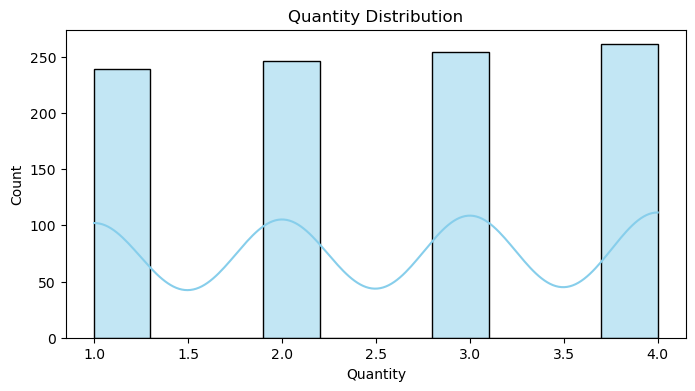

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(transactions_df['Quantity'], kde=True, bins=10, color='skyblue')
plt.title('Quantity Distribution')
plt.show()

C:\Users\rvima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


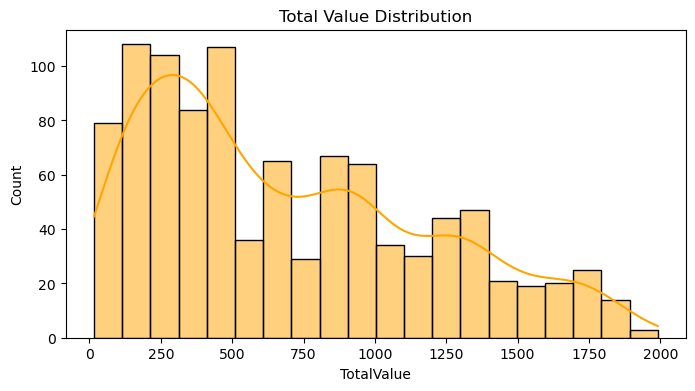

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(transactions_df['TotalValue'], kde=True, bins=20, color='orange')
plt.title('Total Value Distribution')
plt.show()

C:\Users\rvima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


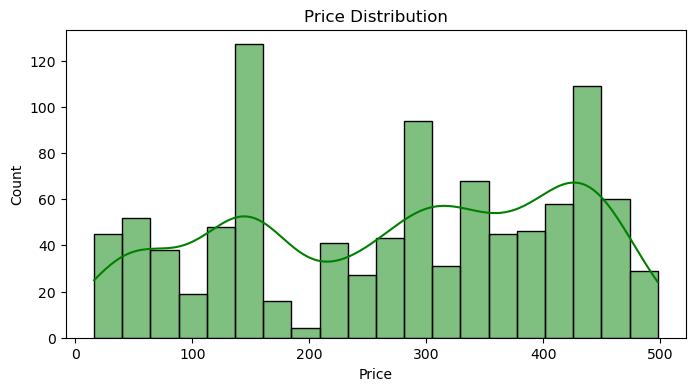

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(transactions_df['Price'], kde=True, bins=20, color='green')
plt.title('Price Distribution')
plt.show()

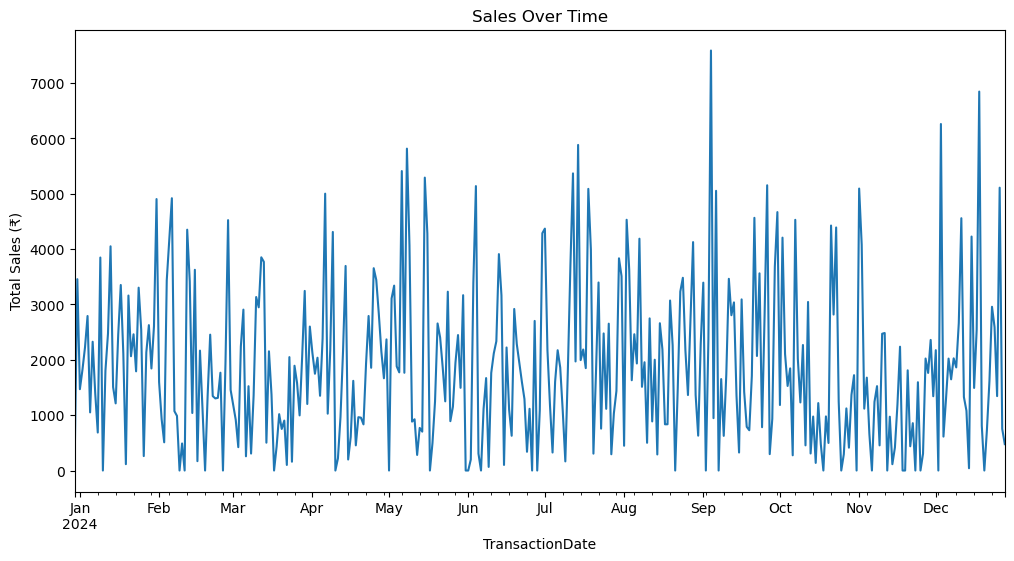

In [13]:
plt.figure(figsize=(12, 6))
transactions_df.set_index('TransactionDate').resample('D')['TotalValue'].sum().plot()
plt.title('Sales Over Time')
plt.ylabel('Total Sales (₹)')
plt.show()

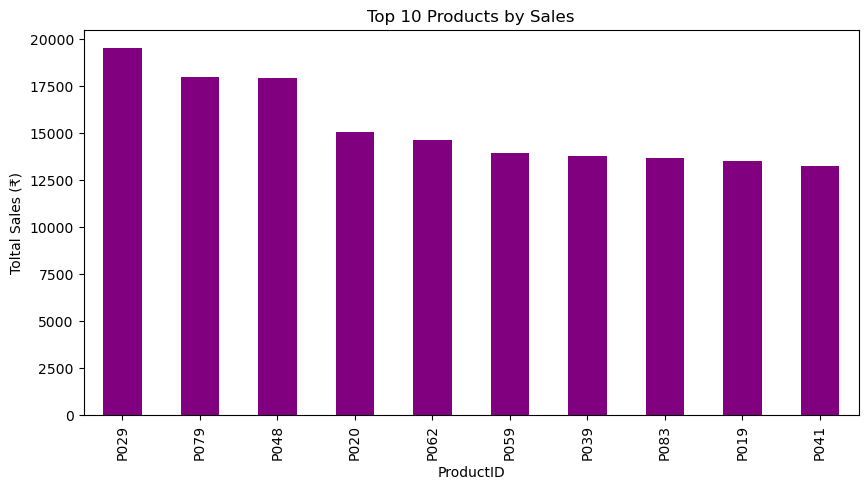

In [16]:
top_products = transactions_df.groupby('ProductID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Sales')
plt.ylabel('Toltal Sales (₹)')
plt.show()

In [17]:
#Customers table
customers_df = pd.read_csv('Customers.csv')

In [18]:
print('Dataset Info:')
print(customers_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [19]:
print('\nMissing Values:')
print(customers_df.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [20]:
duplicates = customers_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [22]:
print("\nUnique Counts:")
for col in customers_df.columns:
    unique_count = customers_df[col].nunique()
    print(f"{col}: {unique_count} unique values")


Unique Counts:
CustomerID: 200 unique values
CustomerName: 200 unique values
Region: 4 unique values
SignupDate: 179 unique values


In [23]:
print("\nDescriptive Statistics:")
print(customers_df.describe())


Descriptive Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [25]:
if 'Age' in customers_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(customers_df['Age'], kde=True, bins=10, color='skyblue')
    plt.title('Age Distribution')
    plt.show()

In [27]:
if 'Gender' in customers_df.columns:
    plt.figure(figsize=(6, 6))
    customers_df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
    plt.title('Gender Distribution')
    plt.ylabel('')
    plt.show()

In [29]:
if 'Location' in customers_df.columns:
    top_locations = customers_df['Location'].value_counts().nlargest(10)
    plt.figure(figsize=(10, 5))
    top_locations.plot(kind='bar', color='orange')
    plt.title('Top 10 Locations by Number of Customers')
    plt.ylabel('Number of Customers')
    plt.show()

In [33]:
numeric_columns = customers_df.select_dtypes(include=['number'])

In [34]:
if not numeric_columns.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns found for correlation heatmap.")

No numeric columns found for correlation heatmap.


In [35]:
#Products table
products_df = pd.read_csv('Products.csv')

In [37]:
print('Dataset Info:')
print(products_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [38]:
print("\nMissing Values:")
print(products_df.isnull().sum())


Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [39]:
duplicates = products_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [40]:
print("\nUnique Counts:")
for col in products_df.columns:
    unique_count = products_df[col].nunique()
    print(f"{col}: {unique_count} unique values")


Unique Counts:
ProductID: 100 unique values
ProductName: 66 unique values
Category: 4 unique values
Price: 100 unique values


In [41]:
print("\nDescriptive Statistics:")
print(products_df.describe())


Descriptive Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


C:\Users\rvima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


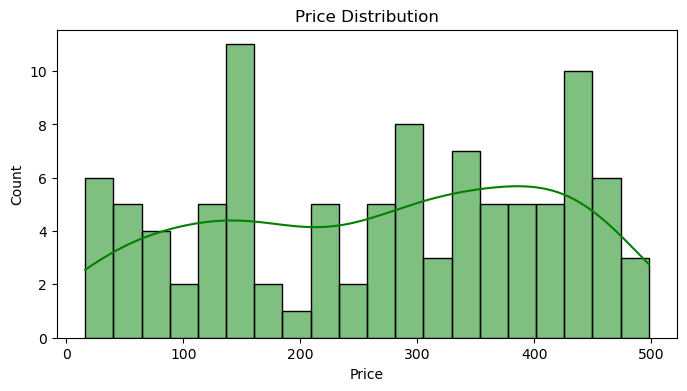

In [43]:
if 'Price' in products_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(products_df['Price'], kde=True, bins=20, color='green')
    plt.title('Price Distribution')
    plt.show()

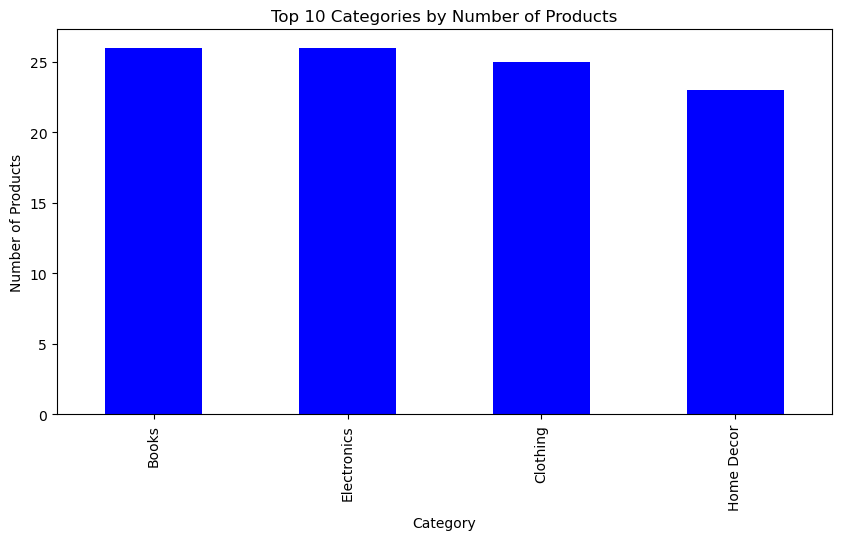

In [45]:
if 'Category' in products_df.columns:
    top_categories = products_df['Category'].value_counts().nlargest(10)
    plt.figure(figsize=(10, 5))
    top_categories.plot(kind='bar', color='blue')
    plt.title('Top 10 Categories by Number of Products')
    plt.ylabel('Number of Products')
    plt.show()

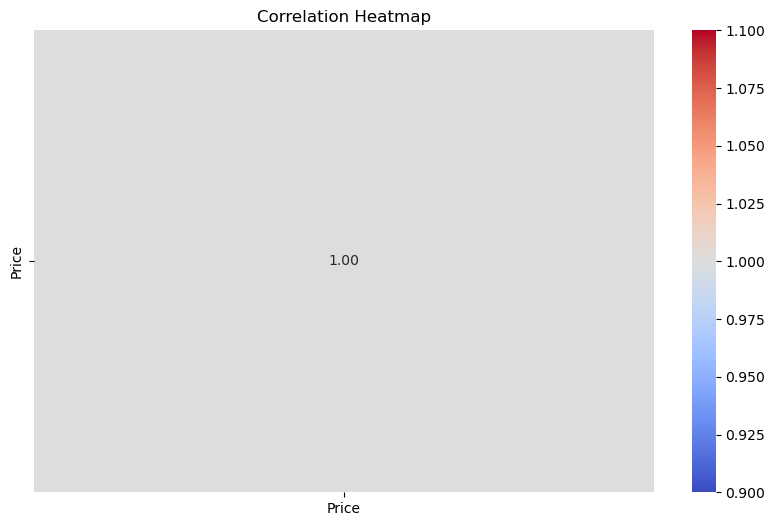

In [46]:
numeric_columns = products_df.select_dtypes(include=['number'])

if not numeric_columns.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns found for correlation heatmap.")